# Case Study

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Help funcs for colored output
from termcolor import colored, cprint
def green(txt):
    return colored(txt, 'green')
def red(txt):
    return colored(txt, 'red')
def blue(txt):
    return colored(txt, 'cyan')
def bold(txt):
    return colored(txt, attrs=['bold'])

In [3]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index and id
df = df.iloc[:, 2:]

## Visualisierung 1.0

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
count,1.499700e+04,14997.000000,14997.000000,14997.000000,1.499700e+04,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,...,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,3.328665e+06,3.372541,2.126525,2096.866973,1.470074e+04,1.509602,0.006801,937.559056,0.227646,3.395279,...,1972.397546,77.452024,98076.237514,47.554230,-122.213873,1991.480029,12567.922051,48.619183,104.142279,152.761462
std,1.643589e+07,0.902843,0.769211,984.438531,3.843318e+04,0.545485,0.082192,268.828882,0.755120,0.642622,...,29.545072,385.484291,53.582638,0.140886,0.139783,692.541100,26829.909688,22.174567,13.005608,25.725446
min,1.000000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,93.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000,10.010585,55.397985,75.072384
25%,3.180000e+05,3.000000,1.750000,1430.000000,5.000000e+03,1.000000,0.000000,757.720000,0.000000,3.000000,...,1953.000000,0.000000,98031.000000,47.458500,-122.326000,1480.000000,5040.000000,29.262910,95.307368,132.916247
50%,4.520000e+05,3.000000,2.250000,1920.000000,7.567000e+03,1.500000,0.000000,936.580000,0.000000,3.000000,...,1977.000000,0.000000,98065.000000,47.566900,-122.234000,1840.000000,7604.000000,48.556530,104.253722,152.871904
75%,6.600000e+05,4.000000,2.500000,2570.000000,1.068800e+04,2.000000,0.000000,1116.120000,0.000000,4.000000,...,1999.000000,0.000000,98117.000000,47.675400,-122.126000,2380.000000,10050.000000,67.851291,112.974891,172.438906
max,1.000000e+08,11.000000,8.000000,17180.000000,1.164794e+06,3.500000,1.000000,1919.340000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6210.000000,871200.000000,86.999842,157.639420,229.276426


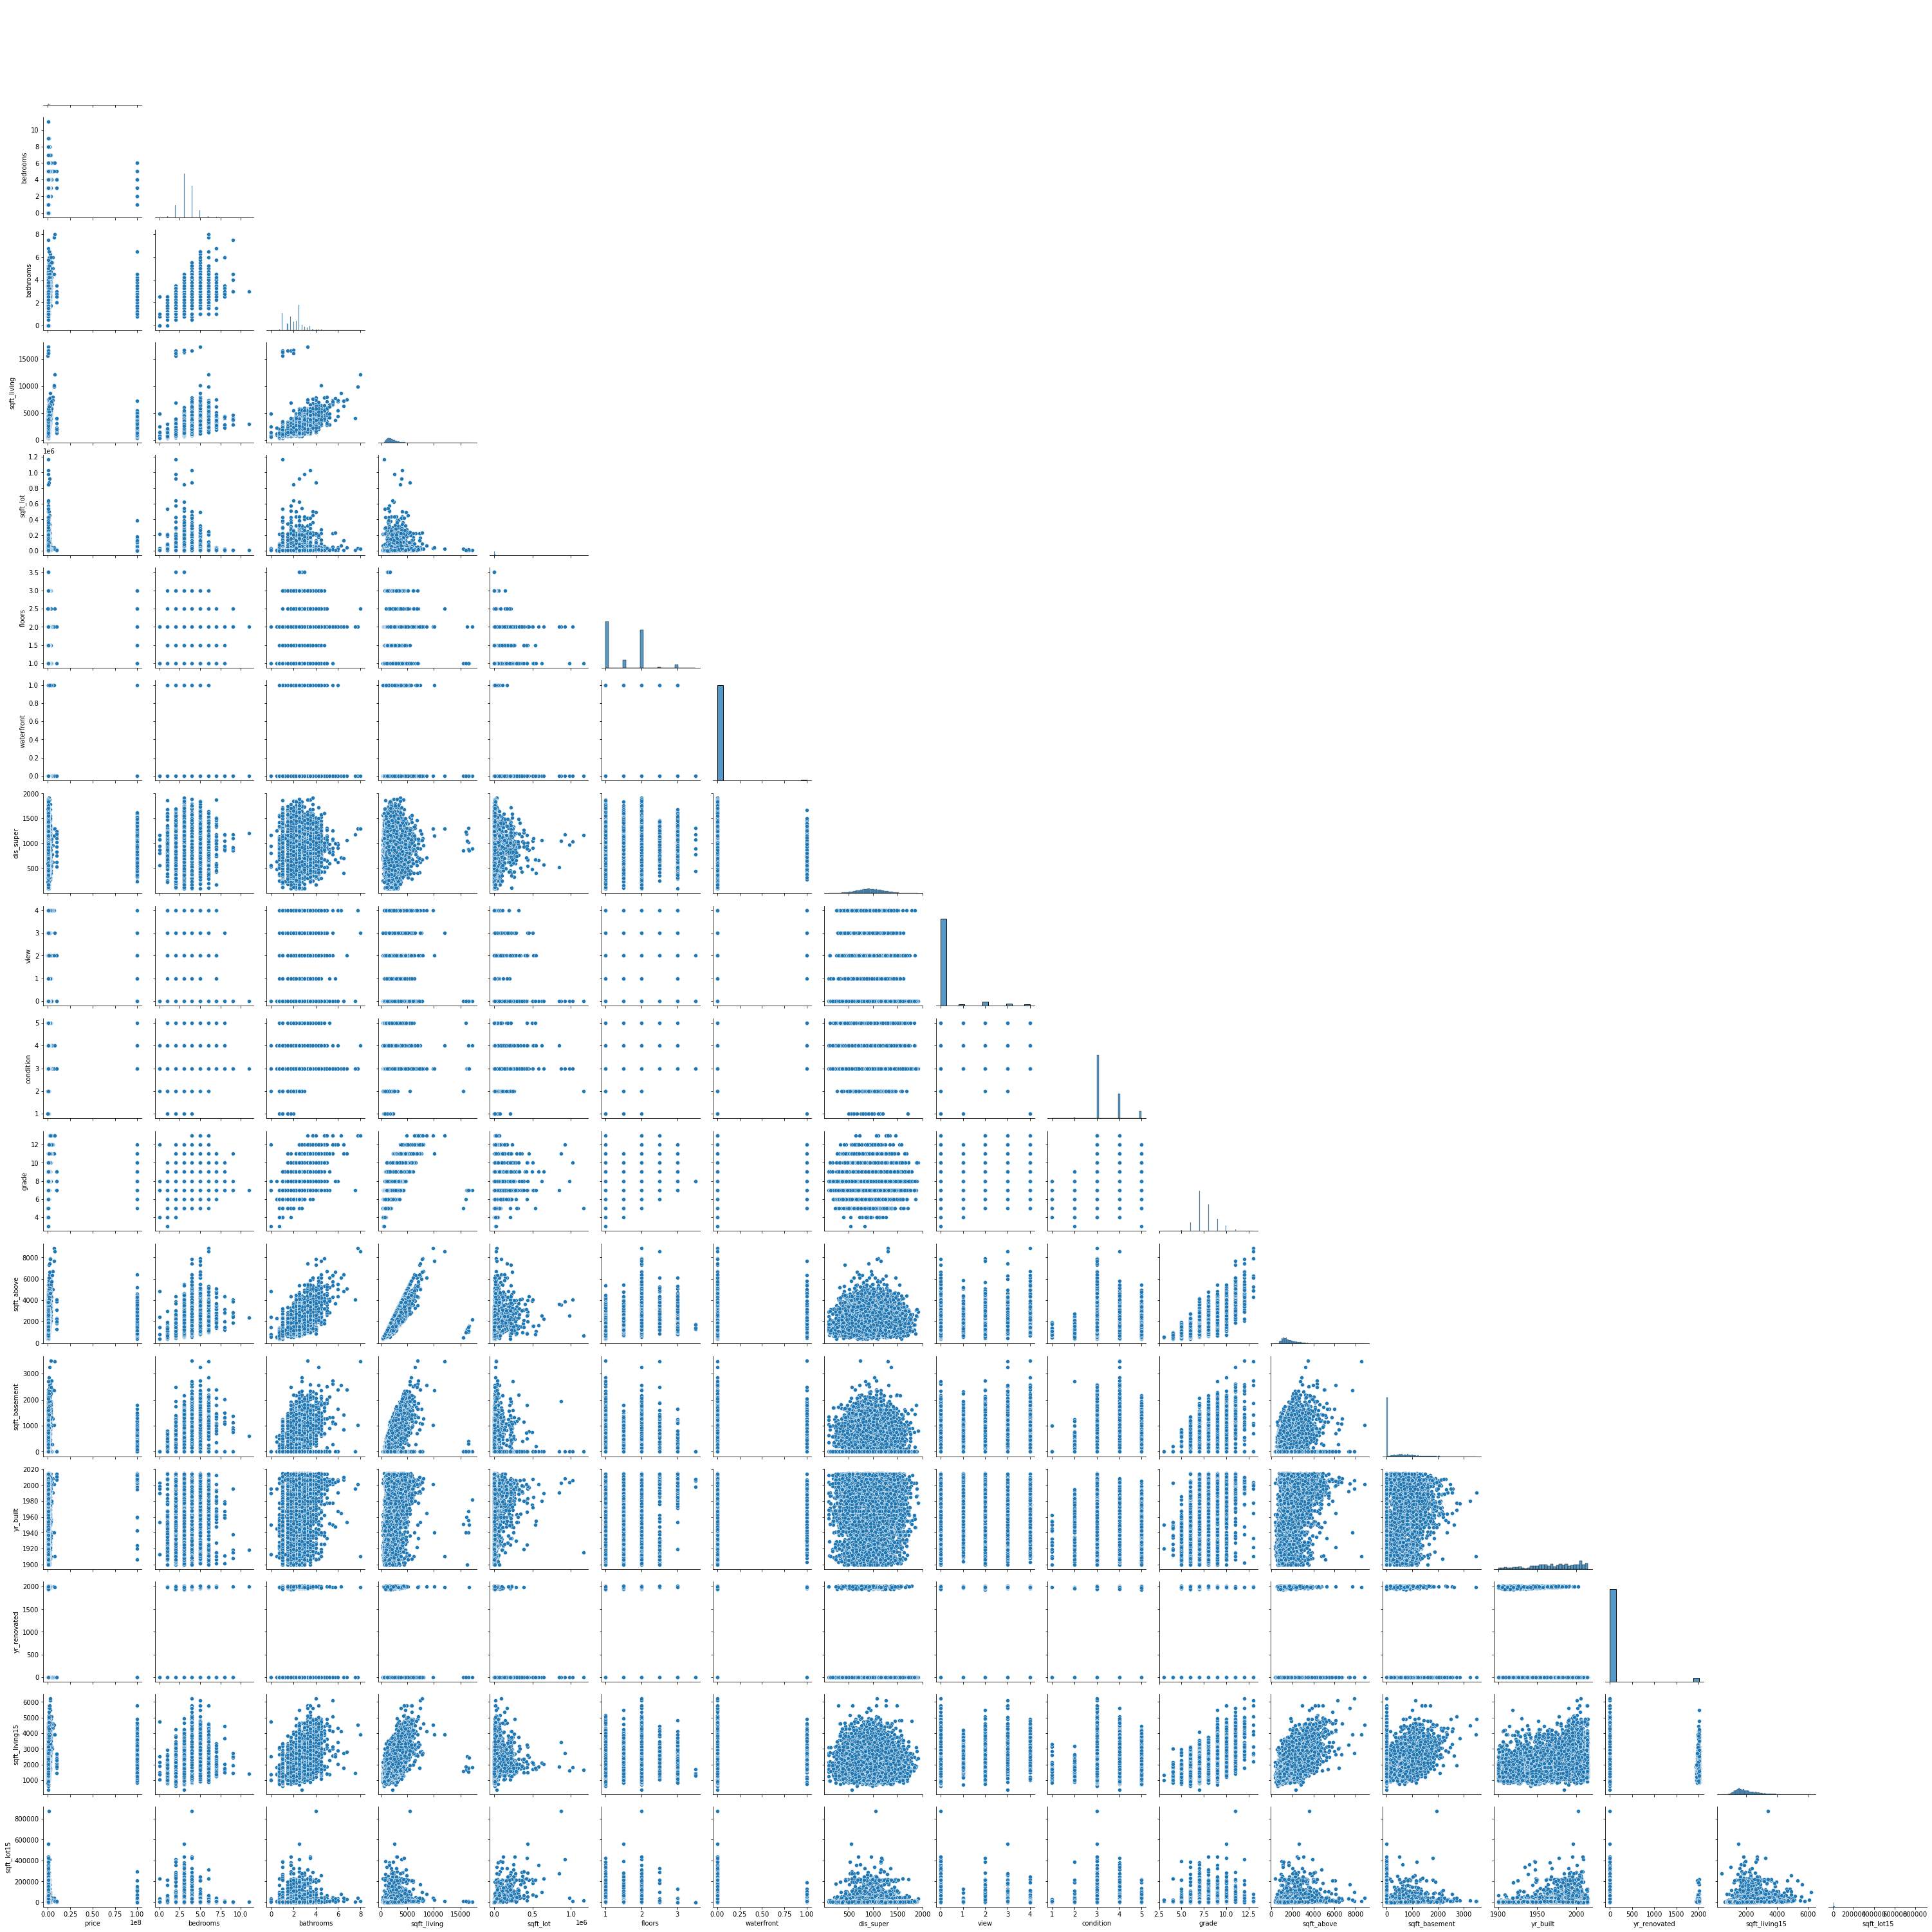

In [4]:
#JOKE: Aber vllt. was ähnliches zur ersten visualisierung
sns.pairplot(df, 
    x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    y_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    corner=True)

## Ausreißer

Der Preis ist sehr auffällig:


<AxesSubplot:>

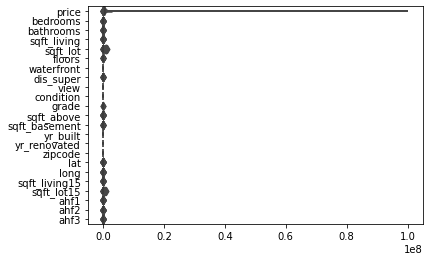

In [27]:
#Visuallisierung von Ausreißern
print("Der Preis ist sehr auffällig:")
sns.boxenplot(data=df,orient="h")


## Missing Values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   date           15000 non-null  object 
 2   price          15000 non-null  float64
 3   bedrooms       15000 non-null  int64  
 4   bathrooms      15000 non-null  float64
 5   sqft_living    15000 non-null  int64  
 6   sqft_lot       15000 non-null  int64  
 7   floors         15000 non-null  float64
 8   waterfront     14997 non-null  float64
 9   dis_super      14997 non-null  float64
 10  view           14997 non-null  float64
 11  condition      14997 non-null  float64
 12  grade          14997 non-null  float64
 13  sqft_above     14997 non-null  float64
 14  sqft_basement  14997 non-null  float64
 15  yr_built       14997 non-null  float64
 16  yr_renovated   15000 non-null  int64  
 17  zipcode        15000 non-null  int64  
 18  lat   

In [5]:
print(f'Folgende {red(len(df[df.isnull().any(axis=1)]))} Zeilen haben ausgewiesene MV')
df[df.isnull().any(axis=1)]

Folgende 3 Zeilen haben ausgewiesene MV


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
7163,20140909T000000,405000.0,3,1.75,1760,5355,1.0,NaN,NaN,NaN,...,NaN,0,98118,47.5368,-122.267,1790,6225,13.843391,109.343999,123.187390
10957,20150107T000000,406000.0,2,1.00,880,3000,1.0,NaN,NaN,NaN,...,NaN,0,98115,47.6749,-122.323,890,3000,50.170114,102.588214,152.758329
14780,20141107T000000,655000.0,3,1.00,1270,3600,1.5,NaN,NaN,NaN,...,NaN,0,98119,47.6368,-122.370,1710,3600,56.035650,121.245433,177.281083


In [8]:
#Löschen aller Zeilen mit MV
df=df.dropna()

## Noise

## Transformation

### A) Datum

In [28]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3,renovated_yn,last_renovated
0,2014-07-08,336000.0,4,2.50,2530,8169,2.0,0.0,562.16,0.0,...,98003,47.2634,-122.312,2220,8013,24.658459,108.183999,132.842458,0,22.0
1,2014-05-27,1600000.0,3,3.25,3790,19000,2.0,0.0,1462.74,4.0,...,98177,47.7240,-122.373,2740,18628,18.682061,83.213016,101.895077,0,30.0
2,2015-04-17,460000.0,4,1.75,1870,8663,1.0,0.0,599.53,0.0,...,98133,47.7366,-122.350,1560,7800,75.078050,101.082827,176.160876,0,66.0
3,2015-01-07,998500.0,3,1.75,2140,4800,2.0,0.0,970.84,0.0,...,98112,47.6311,-122.312,2440,4800,49.367640,97.749706,147.117347,0,110.0
4,2014-07-14,745000.0,3,2.75,3010,12432,1.0,0.0,1157.55,0.0,...,98052,47.6392,-122.108,2500,12432,43.343635,98.282451,141.626086,0,45.0


### B) Renovierung

In [34]:
renovated_yn= []
last_renovated=[]
df["year_sold"]=pd.DatetimeIndex(df['date']).year

for i in df.index:
    if df["yr_renovated"][i] != 0:
        renovated_yn.append(1)
        last_renovated.append(df["year_sold"][i]-df["yr_renovated"][i])
    else:
        renovated_yn.append(0)
        last_renovated.append(df["year_sold"][i]-df["yr_built"][i])

del df["year_sold"]
df["renovated_yn"] = renovated_yn
df["last_renovated"] = last_renovated
df.iloc[:,-2:]

,renovated_yn,last_renovated
0,0,21.0
1,0,29.0
2,0,66.0
3,0,110.0
4,0,44.0
...,...,...
14995,0,101.0
14996,0,20.0
14997,0,24.0
14998,0,11.0


### C) Waterfront

In [22]:
df["waterfront"].value_counts()

0.0    14895
1.0      102
Name: waterfront, dtype: int64

### D) sqft_basement

In [26]:
df['sqft_basement'].describe()

count    14997.000000
mean       285.412549
std        438.675563
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       3500.000000
Name: sqft_basement, dtype: float64

### Normalisierung

### Standardisierung

## Korrelation

### A) Korrelationen zum Preis

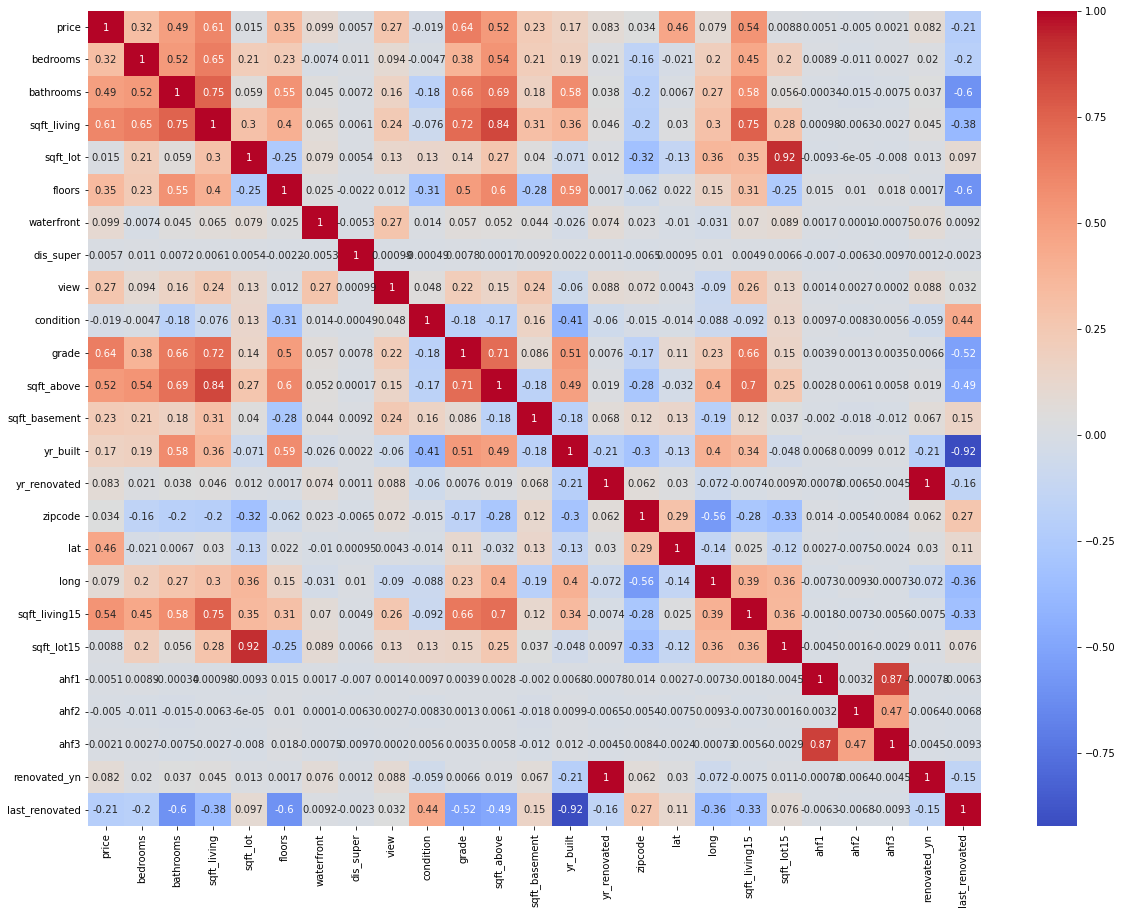

In [25]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap, annot=True)
plt.show()

In [11]:
rel_features =[]
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
print("Relevante Korrelationen:")
for i in ix:
    if corr_fig[i]>= 0.3 or corr_fig[i]<=-0.3:
        rel_features.append(i)
        print("Die Korrelation von", i,"zum Preis:", corr_fig[i])

Relevante Korrelationen:
Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.6401067473706725
Die Korrelation von sqft_living zum Preis: 0.6064133298990662
Die Korrelation von sqft_living15 zum Preis: 0.5421867907167203
Die Korrelation von sqft_above zum Preis: 0.5159252796909916
Die Korrelation von bathrooms zum Preis: 0.4930850581685278
Die Korrelation von lat zum Preis: 0.45855171827440405
Die Korrelation von floors zum Preis: 0.34629043489405137
Die Korrelation von bedrooms zum Preis: 0.31769405385196603


### A) Korrelationen zwischen den Features

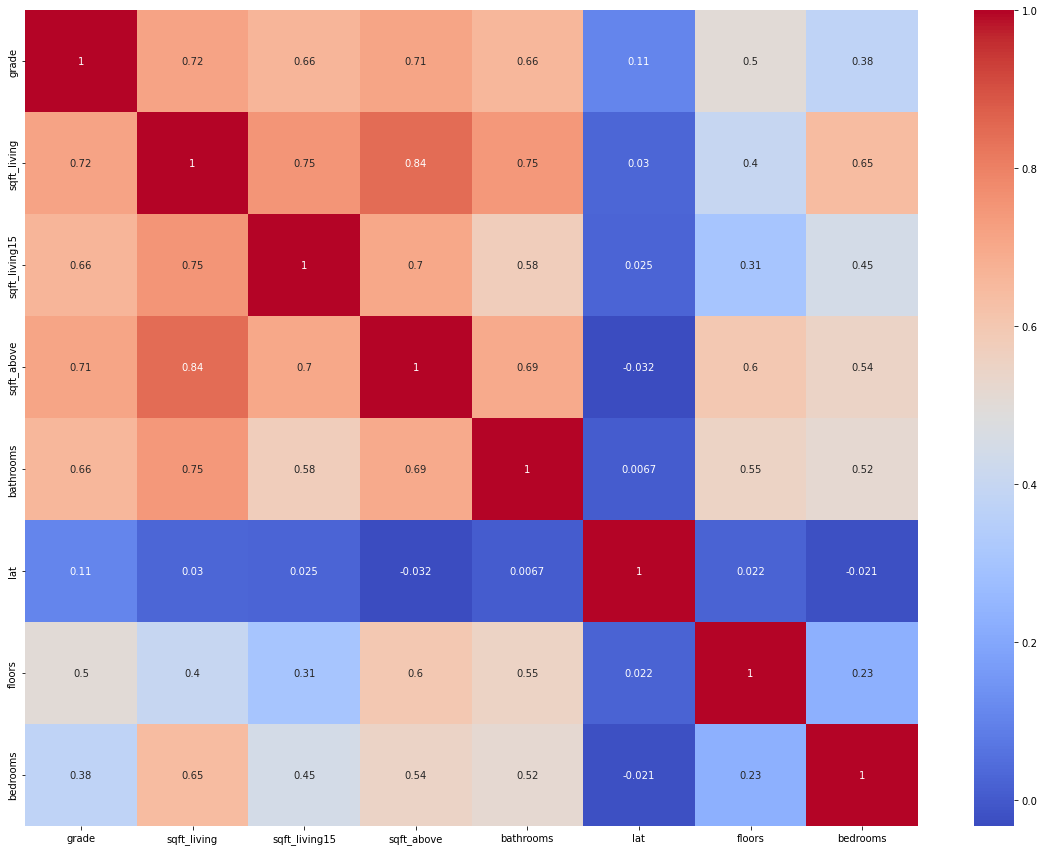

In [17]:
#rel_features.remove("price")
corr_rel = corr.loc[rel_features,rel_features]
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr_rel,cmap=cmap, annot=True)
plt.show()

## Feature Selection